In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
path = os.path.join(os.getcwd(),'datasets')
reviews = pd.read_csv(os.path.join(path, 'olist_order_reviews_dataset.csv'))
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


# Outras informações
Há mais arquivos com algumas outras informações que podem ser de grande valor para um futuro `Feature Engineering`. Vejamos a relação dos bancos

![Relação dos Bancos](https://i.imgur.com/HRhd2Y0.png)

## olist_orders_dataset apresenta se um produto foi enviado e quanto tempo demorou para ser entregue. Essa informaçao pode ser importante

In [3]:
orders = pd.read_csv(os.path.join(path, 'olist_orders_dataset.csv'))
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# Por enquanto, não me interessa quem comprou. Aqui, estou curioso sobre quanto tempo demorou para ser entregue

In [4]:
columns_to_stay = ['order_id','order_delivered_carrier_date', 'order_delivered_customer_date']
orders = orders[columns_to_stay]
orders.head()

,order_id,order_delivered_carrier_date,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-04 19:55:00,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 14:31:00,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 13:50:00,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-22 13:39:59,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-14 19:46:34,2018-02-16 18:17:02


# Já que a intenção é identificar o valor de review_score através do texto, remover algumas colunas

In [5]:
columns_to_remove = ['review_id']
reviews = reviews.drop(columns_to_remove, axis=1)
reviews.head()

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


# Data Treatment and Visualization


timestamp e creation_date são do tipo datetime, vamos transforma-los para tal

In [6]:
reviews.dtypes

order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [7]:
reviews['review_creation_date'] = reviews['review_creation_date'].apply(pd.to_datetime)
reviews['review_answer_timestamp'] = reviews['review_answer_timestamp'].apply(pd.to_datetime)

In [8]:
reviews['review_score'].value_counts()

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

## Quantos NaN existem nessas colunas

In [9]:
print(
    reviews['review_comment_title'].isna().sum(),
    reviews['review_comment_message'].isna().sum()
)

88285 58247


In [10]:
def nan_to_empty_string(row):
    if row is np.NaN:
        row = ''.strip()
    else:
        pass
    return row

reviews['review_comment_title'] = reviews['review_comment_title'].apply(nan_to_empty_string)
reviews['review_comment_message'] = reviews['review_comment_message'].apply(nan_to_empty_string)

## Mesmo processo para orders

In [11]:
orders.dtypes

order_id                         object
order_delivered_carrier_date     object
order_delivered_customer_date    object
dtype: object

In [12]:
orders['order_delivered_carrier_date'] = orders['order_delivered_carrier_date'].apply(pd.to_datetime)
orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].apply(pd.to_datetime)

# Um pouco de Feature Engineering

Criando outras colunas para poder relacionar com o dataset de reviews e conseguir plotar um gráfico com as informações

In [13]:
orders['Time waiting'] = orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']
orders['Time waiting'] = orders['Time waiting'].apply(lambda x: x.total_seconds())

orders = orders.drop(['order_delivered_customer_date', 'order_delivered_carrier_date'], axis=1)

In [14]:
orders['Time waiting'].isna().sum()

2966

## Criando uma coluna com o timestamp entre o pedido de review e a realização do review pelo usuario

In [15]:
reviews['review timestamp'] = reviews['review_answer_timestamp'] - reviews['review_creation_date']
reviews['review timestamp'] = reviews['review timestamp'].apply(lambda x: x.total_seconds())

reviews = reviews.drop(['review_answer_timestamp', 'review_creation_date'], axis=1)

In [16]:
reviews['review timestamp'].isna().sum()

0

## Criando uma coluna com as features textuais

com uma coluna que ja une duas outras, não preciso mais dessas duas

In [17]:
def join_text(row):
    return '{} {} '.format(
        row['review_comment_title'],
        row['review_comment_message'])

reviews['review'] = reviews[['review_comment_title','review_comment_message']].apply(join_text, axis=1)
reviews = reviews.drop(['review_comment_title','review_comment_message'], axis=1)

In [18]:
orders.head()

,order_id,Time waiting
0,e481f51cbdc54678b7cc49136f2d6af7,523813.0
1,53cdb2fc8bc7dce0b6741e2150273451,1040205.0
2,47770eb9100c2d0c44946d9cf07ec65d,792989.0
3,949d5b44dbf5de918fe9c16f97b45f8a,816523.0
4,ad21c59c0840e6cb83a9ceb5573f8159,167428.0


In [19]:
print(
    orders.shape,
    reviews.shape
)

(99441, 2) (100000, 4)


### Como é mostrado acima, há mais informações de reviews que há de orders. Eu quero somente os registros que possuem informações de order. 

In [20]:
review_merge = reviews.merge(
    orders,
    how='inner',
    on='order_id'
)

review_merge.head()

,order_id,review_score,review timestamp,review,Time waiting
0,73fc7af87114b39712e6da79b0a377eb,4,78419.0,,420319.0
1,a548910a1c6147796b98fdf73dbeba33,5,97513.0,,619745.0
2,f9e4b658b201a9f2ecdecbb34bed034b,5,138984.0,,868220.0
3,658677c97b385a9be170737859d3511b,5,79326.0,Recebi bem antes do prazo estipulado.,845028.0
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,124013.0,Parabéns lojas lannister adorei comprar pela ...,1112241.0


## Há produtos que não possuem registros da entrega para o cliente. Vamos analisar como reagem os usuários

In [21]:
sem_data_entrega = review_merge[review_merge['Time waiting'].isna()]
sem_data_entrega.head()

,order_id,review_score,review timestamp,review,Time waiting
19,583174fbe37d3d5f0d6661be3aad1786,1,15037.0,Não chegou meu produto Péssimo,NaN
69,97d2f8fe76f2f253b8291e17b5383884,1,915043.0,O produto não chegou no prazo estipulado e ca...,NaN
90,a2714ecbf6eeb3bb9cd7dba6dc1c5e82,1,44854.0,Pedi reembolso e sem resposta até momento,NaN
105,96b947c986b42f213c9e6b8ccccedb89,3,75221.0,Não recebi o produto.,NaN
170,2e5dc86c8c4aa663549caf5e31de840d,1,325512.0,fiz minha compra faz 30 dias e não recebi ain...,NaN


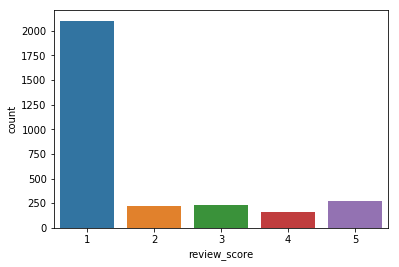

In [22]:
sns.countplot(sem_data_entrega['review_score'])

## Para tratar os dados faltantes nessa coluna, utilizarei a média do dataset como valor. 

In [23]:
media_time_waiting = review_merge['Time waiting'].mean()
review_merge['Time waiting'].fillna(media_time_waiting, inplace=True)

In [24]:
review_merge['Time waiting'].isna().sum()

0

In [25]:
review_merge.head()

,order_id,review_score,review timestamp,review,Time waiting
0,73fc7af87114b39712e6da79b0a377eb,4,78419.0,,420319.0
1,a548910a1c6147796b98fdf73dbeba33,5,97513.0,,619745.0
2,f9e4b658b201a9f2ecdecbb34bed034b,5,138984.0,,868220.0
3,658677c97b385a9be170737859d3511b,5,79326.0,Recebi bem antes do prazo estipulado.,845028.0
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,124013.0,Parabéns lojas lannister adorei comprar pela ...,1112241.0


## Seria interessante ver a relação entre o tamanho do review com a nota atribuida

In [26]:
review_merge['review len'] = review_merge['review'].apply(lambda x: len(x.strip()))
review_merge.head()

,order_id,review_score,review timestamp,review,Time waiting,review len
0,73fc7af87114b39712e6da79b0a377eb,4,78419.0,,420319.0,0
1,a548910a1c6147796b98fdf73dbeba33,5,97513.0,,619745.0,0
2,f9e4b658b201a9f2ecdecbb34bed034b,5,138984.0,,868220.0,0
3,658677c97b385a9be170737859d3511b,5,79326.0,Recebi bem antes do prazo estipulado.,845028.0,37
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,124013.0,Parabéns lojas lannister adorei comprar pela ...,1112241.0,100


In [27]:
review_merge['review len'].max()

229

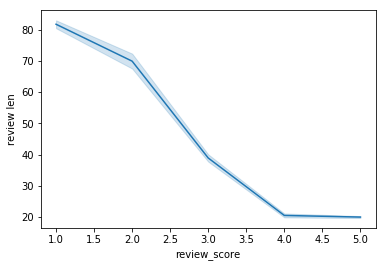

In [28]:
sns.lineplot(y='review len',x='review_score', data=review_merge)

## Gráfico acima mostra que, geralmente, quanto maior o review, menor é a nota

## Correlação entre as features

In [29]:
review_merge.corr()

,review_score,review timestamp,Time waiting,review len
review_score,1.000000,0.007052,-0.281908,-0.398105
review timestamp,0.007052,1.000000,0.007019,-0.001839
Time waiting,-0.281908,0.007019,1.000000,0.087630
review len,-0.398105,-0.001839,0.087630,1.000000


# Gráficos

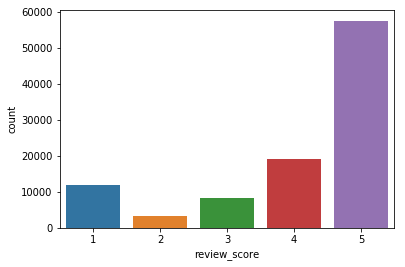

In [30]:
sns.countplot(review_merge['review_score'])

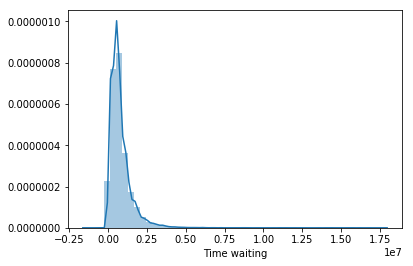

In [31]:
sns.distplot(review_merge['Time waiting'])

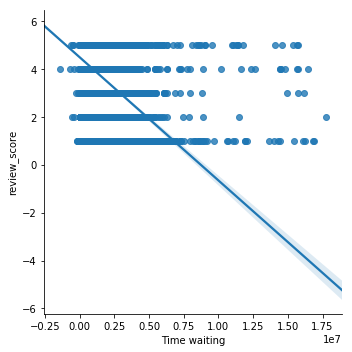

In [32]:
sns.lmplot(x='Time waiting', y='review_score',data= review_merge)

## Gráfico acima mostra que o review tende a ser menor quanto maior o tempo de espera pelo produto

# Agora vamos partir para o ML

In [33]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import FunctionTransformer, StandardScaler

In [34]:
review_merge.head()

,order_id,review_score,review timestamp,review,Time waiting,review len
0,73fc7af87114b39712e6da79b0a377eb,4,78419.0,,420319.0,0
1,a548910a1c6147796b98fdf73dbeba33,5,97513.0,,619745.0,0
2,f9e4b658b201a9f2ecdecbb34bed034b,5,138984.0,,868220.0,0
3,658677c97b385a9be170737859d3511b,5,79326.0,Recebi bem antes do prazo estipulado.,845028.0,37
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,124013.0,Parabéns lojas lannister adorei comprar pela ...,1112241.0,100
